<a href="https://colab.research.google.com/github/FabianaAlbuquerque97/Quantization/blob/main/Exemplo_1_K_Means_Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quantização Vetorial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
def initialize_centroids(X, k):
    """Inicializa os centroides escolhendo k amostras aleatórias do conjunto de dados."""
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

In [ ]:
def assign_clusters(X, centroids):
    """Atribui cada ponto ao centroide mais próximo."""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [ ]:
def update_centroids(X, labels, k):
    """Recalcula os centroides como a média dos pontos atribuídos a cada cluster."""
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans_quantization(X, k, max_iters=100, tol=1e-4):
    """Aplica quantização baseada em K-Means."""
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)

        # Verifica convergência
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    # Substitui cada ponto pelo centroide mais próximo
    quantized_X = centroids[labels]
    return quantized_X, centroids

In [ ]:
def apply_kmeans_to_image(image_path, k):
    """Aplica K-Means Quantization a uma imagem."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converte para RGB

    h, w, c = image.shape
    X = image.reshape((-1, 3))  # Converte a imagem para uma matriz 2D (pixels, canais)

    quantized_X, centroids = kmeans_quantization(X, k)
    quantized_image = quantized_X.reshape((h, w, c)).astype(np.uint8)

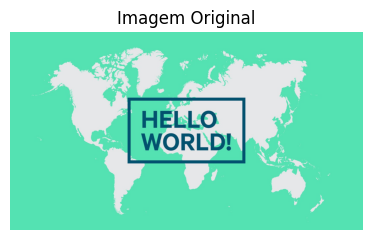

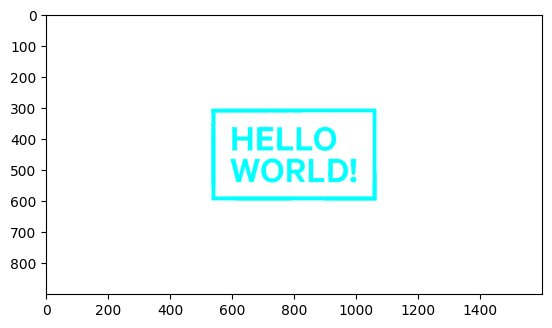

In [ ]:

    # Exibe as imagens
    plt.figure(figsize=(10, 5))

    # Carrega a imagem
    image = plt.imread("/content/Hello_Word.jpeg")

    # Cria o subplot
    plt.subplot(1, 2, 1)
    plt.title("Imagem Original")

    # Exibe a imagem
    plt.imshow(image)

    # Desabilita os eixos
    plt.axis("off")

    # Mostra o gráfico
    plt.show()

    # código para carregar e quantizar a imagem

    # Quantização uniforme
    def quantize(image, k):
         interval = 256 / k
         quantized_image = np.round(image / interval) * interval
         return quantized_image

    # Define o valor de k
    k = 8

    # Quantiza a imagem
    quantized_image = quantize(image, k)

    # Exibe a imagem quantizada
    plt.imshow(quantized_image)
